In [83]:
import pandas as pd
from dbgsom.dbgsom_ import DBGSOM
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [84]:
data = pd.read_csv(
    "F:\Dokumente\git\data\CIC-IDS2017\MachineLearningCSV\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
).dropna()


In [85]:
X = data.drop(columns=" Label")
X.replace([np.inf, -np.inf], 0, inplace=True)
y = data[" Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [146]:
scaler = StandardScaler(with_mean=False)
ohe = OneHotEncoder()
som = DBGSOM(
    max_epochs=500,
    spreading_factor=0.5,
    max_neurons=1000,
    # threshold_method="se",
    growth_criterion="entropy"
)
col_transformer = ColumnTransformer(
    transformers=[
        ("ohe", ohe, [" Destination Port", "Fwd PSH Flags", " Bwd PSH Flags"])
    ],
    remainder="passthrough",
    sparse_threshold=0,
)
pipe = Pipeline(
    steps=[
        ("col_transformer", col_transformer),
        ("scaler", scaler),
        ("som", som),
    ]
)


In [147]:
pipe.fit(X_train, y_train)


In [ ]:
som.topographic_error_


0.12417911849654427

In [ ]:
pipe.score(X_test, y_test)


0.9917580482306807

c:\tools\miniconda3\envs\py39_dbgsom\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


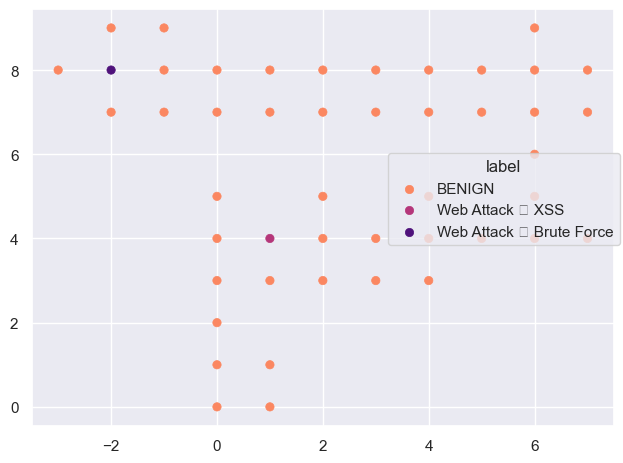

In [ ]:
som.plot(color="label")


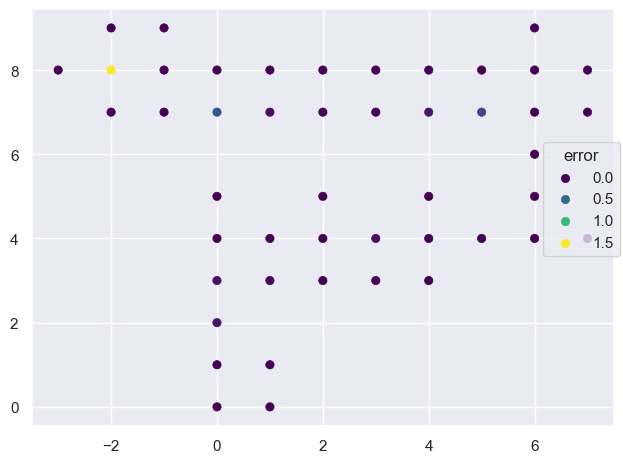

In [ ]:
som.plot(color="error", palette="viridis")


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
f1_score(
    y_test,
    pipe.predict(X_test),
    # average="micro",
    average=None
)


array([0.99731112, 0.65853659, 0.        , 0.        ])